In [1]:
from pathlib import Path
import os
CUR_PATH = Path('.')
UP_ONE_DIR = Path('..')
DATA_PATH = Path('../COVID-19/')
DAILY_CASES = DATA_PATH / 'archived_data' / 'archived_daily_case_updates'
TIME_SERIES = DATA_PATH / 'archived_data' / 'archived_time_series'
CSSE_PATH = DATA_PATH / 'csse_covid_19_data/'
REPORTS = CSSE_PATH / 'csse_covid_19_daily_reports'
CSSE_TIME_SERIES = CSSE_PATH / 'csse_covid_19_time_series'
import pandas as pd


In [37]:
my_list = [1,2,3,4,5]
my_list_plus_one = []
for item in my_list:
    new_item = item + 1
    my_list_plus_one.append(new_item)

In [38]:
my_list_plus_one

[2, 3, 4, 5, 6]

In [40]:
[x**2 for x in my_list]

[1, 4, 9, 16, 25]

In [60]:
data_filenames = [REPORTS / file_name for file_name in os.listdir(REPORTS) if '.csv' in file_name]
all_data_list = [pd.read_csv(file_name) for file_name in data_filenames]
df = pd.concat(all_data_list)

//anaconda/envs/py372/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
df['county_region'] = df['Country/Region'].fillna(df['Country_Region'])
df['province_state'] = df['Province/State'].fillna(df['Province_State'])
df.drop(columns = ['Country/Region', 'Country_Region', 'Province/State', 'Province_State'], inplace=True)
df['last_update'] = df['Last Update'].fillna(df['Last_Update'])
df.drop(columns = ['Last Update', 'Last_Update'], inplace=True)

In [69]:
# set the last update column to be a datetime datatype
df['last_update'] = pd.to_datetime(df['last_update'])

In [ ]:
df['county_region'].value_counts()

In [70]:
us_only = df.loc[df['county_region']=='US']

In [72]:
# sort us_only by time
us_only = us_only.sort_values('last_update')

In [73]:
us_only.head()

,Active,Admin2,Combined_Key,Confirmed,Deaths,FIPS,Lat,Latitude,Long_,Longitude,Recovered,county_region,province_state,last_update
31,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,Washington,2020-01-22 17:00:00
31,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,Washington,2020-01-23 17:00:00
34,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,Chicago,2020-01-24 17:00:00
33,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,Washington,2020-01-24 17:00:00
33,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,Washington,2020-01-25 17:00:00


In [77]:
from matplotlib import pyplot as plt

In [81]:
# add date column
indiana = us_only.loc[us_only['province_state']=='Indiana']
indiana['date'] = indiana['last_update'].dt.date
indiana_by_date = indiana.groupby('date')[['Confirmed', 'Deaths', 'Recovered']].sum()
indiana_by_date.plot(figsize=(20,5))

//anaconda/envs/py372/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [89]:
new_york_provinces = [x for x in us_only['province_state'].unique() if 'NY' in x or 'York' in x]
print(new_york_provinces)

['New York City, NY', 'Westchester County, NY', 'Queens County, NY', 'Nassau County, NY', 'New York County, NY', 'Rockland County, NY', 'Saratoga County, NY', 'Suffolk County, NY', 'Ulster County, NY', 'New York']


//anaconda/envs/py372/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


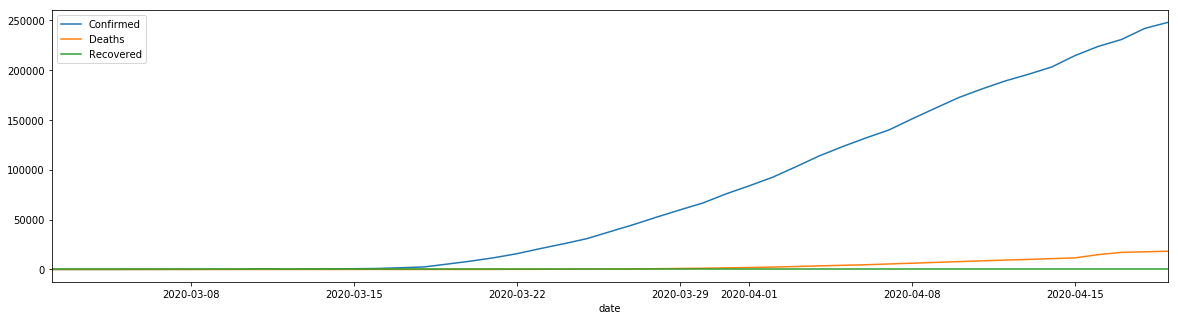

In [90]:
new_york = us_only.loc[us_only['province_state'].isin(new_york_provinces)]
new_york['date'] = new_york['last_update'].dt.date
new_york_by_date = new_york.groupby('date')[['Confirmed', 'Deaths', 'Recovered']].sum()
new_york_by_date.plot(figsize=(20,5))

In [99]:
us_only.head()

,Active,Admin2,Combined_Key,Confirmed,Deaths,FIPS,Lat,Latitude,Long_,Longitude,Recovered,county_region,province_state,last_update,lat
31,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,Washington,2020-01-22 17:00:00,NaN
31,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,Washington,2020-01-23 17:00:00,NaN
34,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,Chicago,2020-01-24 17:00:00,NaN
33,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,Washington,2020-01-24 17:00:00,NaN
33,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,Washington,2020-01-25 17:00:00,NaN


In [100]:
us_only['lat'] = us_only['Lat'].fillna(us_only['Latitude'])
us_only['lon'] = us_only['Long_'].fillna(us_only['Longitude'])

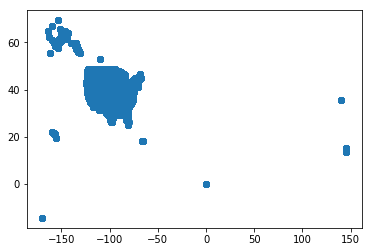

In [103]:
plt.scatter(us_only['lon'], us_only['lat'])

In [104]:
# HOMEWORK
# WHAT IS THE DEAL WITH THE DOTS OUTSIDE OF THE THING THAT LOOKS LIKE THE UNITED STATES
# UNDERSTAND THE CODE HERE SO FAR
# FINISH CLEANING UP THE DATA / COLUMNS
# MAKE A FUNCTION THAT I CAN PASS THINGS LIKE "NEW YORK TO" and get back NY data. or Some other State. 